# FINES_AND_WINES: Exercise 1 v2

Squad name: FORECASTING

Members: Sergio Salvador, Marco Hernani, Helen Navarro, Berta Pfaff

# Exercise 1 - MADRID OPEN DATA

Exploration, analysis and data visualization exercise. We will work with data on infractions committed by drivers in the city of Madrid. The data and information about it was taken from this website https://datos.madrid.es/portal/site/egob/menuitem.c05c1f754a33a9fbe4b2e4b284f1a5a0/?vgnextoid=fb9a498a6bdb9410VgnVCM1000000b205a0aRCRD&vgnextchannel=374512b9ace9f310VgnVCM100000171f5a0aRCRD&vgnextfmt=default

## Load data

We read twelve csv files related to the data for all months for 2020 (one csv file for each month) and join all that data into a single dataframe.

We observe that all datasets had the same columns information, in the same order but some columns names were sligtly different from one dataset to other.
That's why we force the names of the columns. So it's the same for all dataframes, before adding the data to the dataframe with all the information

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob

import os

In [2]:
#Path where the files are located
path = "Files"
os.chdir(path)
#We use glob module to filter for a specific file pattern
file_list = glob.glob("2020*.csv")
print('File names:', file_list)

File names: ['202001_detalle.csv', '202002_detalle.csv', '202003_detalle.csv', '202004_detalle.csv', '202005_detalle.csv', '202006_detalle.csv', '202007_detalle.csv', '202008_detalle.csv', '202009_detalle.csv', '202010_detalle.csv', '202011_detalle.csv', '202012_detalle.csv']


First let's see if all dataframes have the same columns:

In [3]:
cols_name = []
for file in file_list:
    df = pd.read_csv(file ,delimiter= ";" , encoding = "latin_1" )
    cols_name.extend(df.columns)
set(cols_name)

C:\Users\marco\AppData\Local\Temp\ipykernel_10472\1440438889.py:3: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file ,delimiter= ";" , encoding = "latin_1" )


{' PUNTOS',
 'ANIO',
 'CALIFICACION',
 'COORDENADA-X',
 'COORDENADA-Y                                                                                                                                ',
 'COORDENADA_X',
 'COORDENADA_Y',
 'DENUNCIANTE',
 'DESCUENTO',
 'HECHO-BOL',
 'HORA',
 'IMP_BOL',
 'LUGAR',
 'MES',
 'PUNTOS',
 'VEL_CIRCULA',
 'VEL_CIRCULA ',
 'VEL_LIMITE'}

Thanks to the info on the website. We know that all csv had the same columns. In the code above We checked that the same column can be written in a different way. That's why when creating a dataframe that contains all the data in all the csv files, We set the names of the columns.

In [4]:
choosen_cols_name = ['CALIFICACION','LUGAR','MES','ANIO','HORA','IMP_BOL','DESCUENTO',
                            'PUNTOS','DENUNCIANTE','HECHO-BOL','VEL_LIMITE','VEL_CIRCULA',
                            'COORDENADA_X', 'COORDENADA_Y']

df_list = []

for file in file_list:
    df_aux = pd.read_csv(file,delimiter= ";" , encoding = "latin_1" )
    df_aux = df_aux.set_axis(choosen_cols_name, axis=1)
    df_list.append(df_aux)
    
df = pd.concat(df_list)

C:\Users\marco\AppData\Local\Temp\ipykernel_10472\2852830480.py:8: DtypeWarning: Columns (10,11) have mixed types. Specify dtype option on import or set low_memory=False.
  df_aux = pd.read_csv(file,delimiter= ";" , encoding = "latin_1" )


In [5]:
df

,CALIFICACION,LUGAR,MES,ANIO,HORA,IMP_BOL,DESCUENTO,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,COORDENADA_X,COORDENADA_Y
0,GRAVE,ALFONSO XII,1,2020,12.18,200.0,SI,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,,,,
1,GRAVE,AV BADAJOZ 5,1,2020,9.46,200.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN DOBLE FILA. ...,,,,
2,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,13.55,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
3,LEVE,ARISTOTELES 7 POSTERIOR,1,2020,14.00,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR EN LUGAR PROHIBIDO. ...,,,,
4,LEVE,VIRGEN DE LLUC 70,1,2020,12.12,90.0,SI,0,POLICIA MUNICIPAL,ESTACIONAR SOBRE LA ACERA. ...,,,,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
205934,LEVE,CL PADRE DAMIAN 19,12,2020,14.14,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
205935,LEVE,CL JUAN RAMON JIMENEZ 2,12,2020,14.23,90.0,SI,0,SER,ESTACIONAR EN LUGAR PROHIBIDO. VEHÍCULO DE CAT...,,,,
205936,LEVE,CL JUAN RAMON JIMENEZ 15,12,2020,14.30,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,
205937,LEVE,CL VICTOR DE LA SERNA 1,12,2020,9.51,90.0,SI,0,SER,"ESTACIONAR, SIN LA CORRESPONDIENTE AUTORIZACIÓ...",,,,


In [6]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

## Transformation of the dataframe and Analysis

As such, we are not going to work with geographic data, delete the __COORDENADA_X__ and __COORDENADA_Y__ columns.


In [7]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA',
       'COORDENADA_X', 'COORDENADA_Y'],
      dtype='object')

In [8]:
df.drop(["COORDENADA_X", "COORDENADA_Y"], axis=1, inplace=True)
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'ANIO', 'HORA', 'IMP_BOL', 'DESCUENTO',
       'PUNTOS', 'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA'],
      dtype='object')

1993304 rows × 12 columns

We check which columns have constant variables and remove them from the dataframe.Because they don't give us relevant information.

In [9]:
for col in df.columns: 
    # How many unique elements does each column have?
    col_unique_values = df[col].unique()
    if len(col_unique_values)==1:
        print(col, col_unique_values)
        #If the column just has one unique value we drop it
        df.drop(col, axis=1, inplace=True)

ANIO [2020]
DESCUENTO ['SI']


In [10]:
df.columns

Index(['CALIFICACION', 'LUGAR', 'MES', 'HORA', 'IMP_BOL', 'PUNTOS',
       'DENUNCIANTE', 'HECHO-BOL', 'VEL_LIMITE', 'VEL_CIRCULA'],
      dtype='object')

There are empty cells (no values or NaN) in VEL_LIMITE and VEL_CIRCULA, this is because the infraction was not caused by exceeding any speed limit. We will change those empty cells by NaNs.

`r'^\s*$'` this a regular expression (regex) that matches empty lines and white spaces

Regex is a sequence of characters that forms a search pattern.

We write a code that substitute all empty cell (the ones that match the pattern) with NaNs.

In [11]:
df.VEL_LIMITE = df.VEL_LIMITE.replace(r'^\s*$', np.NaN, regex= True)
df.VEL_CIRCULA = df.VEL_CIRCULA.replace(r'^\s*$', np.NaN, regex= True)

In [12]:
df.VEL_LIMITE.unique()

array([nan, ' 70', ' 60', ' 50', ' 90', ' 40', ' 30', ' 80', ' 20', 70,
       90, 50], dtype=object)

In [13]:
df.VEL_CIRCULA.unique()

array([nan, '135', '139', ' 84', ' 65', ' 63', ' 85', ' 75', ' 66', ' 61',
       ' 67', ' 62', ' 68', ' 71', ' 76', ' 69', ' 70', ' 64', ' 72',
       ' 73', ' 77', ' 82', ' 79', ' 74', ' 86', ' 78', ' 92', ' 88',
       ' 99', ' 91', ' 81', ' 96', ' 80', ' 87', '108', '111', ' 95',
       ' 97', '103', '101', '100', '106', ' 98', '102', '122', '105',
       '110', '109', '104', ' 93', ' 83', ' 60', '112', ' 90', ' 89',
       '133', '118', '113', '107', ' 94', '123', '131', '150', '115',
       '114', '116', '120', '117', '125', '127', '124', ' 57', ' 59',
       ' 55', ' 58', ' 54', ' 43', ' 47', ' 45', ' 44', '132', '142',
       '126', '130', '119', '121', '128', '145', '138', ' 49', ' 46',
       ' 51', ' 52', ' 56', ' 41', ' 40', ' 42', ' 48', ' 50', ' 53',
       '137', '143', ' 37', ' 39', '129', '141', '134', '140', '147',
       '136', '160', '144', '155', '149', '148', '151', ' 36', ' 38',
       ' 34', ' 35', '156', '152', '154', '157', '146', '153', '159',
       ' 33', 7

Even though the velocity magnitude is purely numerical. In this case de VEL_LIMITE and VEL_CIRCULA columns are recognized as "object" type. That's because these columns contain NaN values, so we will change these NaN to 0, so We can change the type of these columns to numeric.

In [14]:
df.VEL_LIMITE = df.VEL_LIMITE.replace(np.NaN, 0)
df.VEL_CIRCULA = df.VEL_CIRCULA.replace(np.NaN, 0)

In [15]:
df.VEL_LIMITE = df.VEL_LIMITE.astype(int)
df.VEL_CIRCULA = df.VEL_CIRCULA.astype(int)
df.loc[:, ["VEL_LIMITE", "VEL_CIRCULA"]].dtypes

VEL_LIMITE     int32
VEL_CIRCULA    int32
dtype: object

¿Which is the most repeated speed limit other than zero in all the infractions data?

In [16]:
#how many times each value is repeated
repeticions = df.value_counts(df.VEL_LIMITE)
#We drop the zero
repeticions.drop(0, inplace=True)
#We get the most repeated velocity
repeticions.index[0]

70

We want to create a column called DIFFERENCE_KMH that is the result of substracting from each value of the speed at which the driver was circulating with the speed limit there was where the infraction occured. So We can obtain the top 10 drivers that exceeded the limits the most.

We have then proceeded to create a column called DIFFERENCE_KMH in which the difference between the circulation velocity (VEL_CIRCULA) and the limit velocity (VEL_LIMIT).

In [17]:
df["DIFFERENCE_KMH"] = df["VEL_CIRCULA"] - df["VEL_LIMITE"]

Finally We obtain the top 10 of drivers that exceeded more the limit of velocity.

In [18]:
df.sort_values("DIFFERENCE_KMH", ascending=False).head(10)

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
71,GRAVE,"M 30 FT KM 4,150 CR 1",3,23.43,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
75936,GRAVE,"M 30 XC KM 10,300 CR 3",9,23.25,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,140,70
68661,GRAVE,"M 30 KM 6,700 CR 3 CALZADA 1",11,7.53,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
75935,GRAVE,"M 30 KM 7,800 CALZADA 2",9,1.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
61556,GRAVE,M 30 KM 27 DECRECIENTE C 2,2,4.57,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
59480,GRAVE,M 30 KM 27 CARRIL 2 CALZADA 2,10,2.11,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,160,70
30364,GRAVE,"M 30 FT KM 4,150 CR 4",3,20.23,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
61555,GRAVE,"M 30 FT PK 4,150 CR 4",2,14.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,70,139,69
69609,GRAVE,"M 30 KM 0,500 CALZADA 1",7,5.26,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69
59479,GRAVE,"M 30 KM 6,700 CALZADA 1 CR 3",10,2.06,500.0,6,POLICIA MUNICIPAL,SOBREPASAR LA VELOCIDAD MÁXIMA EN VÍAS LIMITAD...,90,159,69


We obtain a dataframe filtered by all the complaints that have led to the withdrawal of points (that is, points other than zero). Group the dataframe filtered by the public agent that issues the complaint and respond which of all the public agents has a higher average point withdrawal?

We have obtained the unique values from the list PUNTOS to see how many unique number of points  had been taken off.

In [20]:
df.PUNTOS.unique()

array([3, 0, 4, 6, 2], dtype=int64)

We can see that the type of this column is int64, that means that there are not empty cells or NaN values. That's why We can proceed to get our answer without further transformations

We get just the rows with fines that result in the lose of points.

In [22]:
#We get just rows were points value is different to 0
df_points= df[df.PUNTOS!=0]
df_points

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,DENUNCIANTE,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
0,GRAVE,ALFONSO XII,1,12.18,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
11,GRAVE,FRANCISCO VILLAESPESA 53,1,12.54,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0
17,GRAVE,CALLE 30 CALZADA 1 A 5,1,16.45,200.0,4,POLICIA MUNICIPAL,CIRCULAR SIN RESPETAR LA DISTANCIA MÍNIMA DE S...,0,0,0
25,GRAVE,ALBERTO AGUILERA,1,23.20,200.0,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
87,GRAVE,GT PTA TOLEDO-TOLEDO,1,18.18,200.0,4,AGENTES DE MOVILIDAD,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
195775,GRAVE,ORENSE 21,12,19.58,200.0,3,POLICIA MUNICIPAL,EFECTUAR UN CAMBIO DE SENTIDO PROHIBIDO. ...,0,0,0
195776,MUY GRAVE,GTA EMILIO CASTELAR SN,12,6.43,1000.0,6,POLICIA MUNICIPAL,CONDUCIR CON UNA TASA DE ALCOHOLEMIA NO PERMIT...,0,0,0
195778,GRAVE,PZ FERNANDEZ LADREDA,12,19.05,200.0,4,POLICIA MUNICIPAL,REBASAR UN SEMÁFORO EN FASE ROJA. ...,0,0,0
195779,GRAVE,ALCALA 406,12,18.15,200.0,3,POLICIA MUNICIPAL,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,0,0,0


We check that this new dataframe only contains the infractions were points were taken.

In [24]:
set(df_points.PUNTOS)

{2, 3, 4, 6}

We group by the public agents that make the complaint and sum the total of points that each one took.
This way We can see who is the public agency that took more points.

In [25]:
#We group by the DENUNCIANTE column and sum all points for each public agency
df_points.groupby("DENUNCIANTE").sum()

,CALIFICACION,LUGAR,MES,HORA,IMP_BOL,PUNTOS,HECHO-BOL,VEL_LIMITE,VEL_CIRCULA,DIFFERENCE_KMH
DENUNCIANTE,,,,,,,,,,
AGENTES DE MOVILIDAD,GRAVE GRAVE GRAVE GRAVE GRAVE ...,GT PTA TOLEDO-TOLEDO GRAN V...,125823,245714.17,3621900.0,68437,REBASAR UN SEMÁFORO EN FASE ROJA. ...,12750,19382,6632
POLICIA MUNICIPAL,GRAVE GRAVE GRAVE GRAVE GRAVE ...,ALFONSO XII FRANCI...,273693,544027.00,15306100.0,134163,CONDUCIR UTILIZANDO MANUALMENTE TELEFONÍA MÓVI...,1525090,2347810,822720


We get just the rows with fines that result in the lose of points.

In [ ]:
#We get just rows were points value is different to 0
df_points= df[df.PUNTOS!=0]
df_points

We group by the public agents that make the complaint and sum the total of points that each one took.
This way We can see who is the public agency that took more points.

In [ ]:
#We group by the DENUNCIANTE column and sum all points for each public agency
df_points.groupby("DENUNCIANTE").sum()

We eliminate the decimal part from the hour column, then, We show graphically in which hours more infractions were caught.

The values of the HORA column have been transformed to integer so that it loses the decimal part and has been stored in the hours variable to be able to work with this data in a more manageable way.

The `value_counts()` function has been applied to see the result of the sum of the number of times it appears each hour. 

To create the barplot, for the x-axis, we have taken the hours and in the y-axis we have taken the fines.


In [29]:
df.HORA = df.HORA.astype(int)
#We obtain the axis values from here
#numbers of infractions were caught at each hour
infractions_hour = df.HORA.value_counts()
infractions_hour

HORA
10    173426
13    172800
11    166508
12    161114
9     153981
17    141545
14    138095
18    127773
16    124344
19    123612
20    101182
15     99054
8      59261
21     54539
22     38074
23     31988
7      31842
0      29284
1      17987
6      16999
2      10675
5       7081
3       6549
4       5591
Name: count, dtype: int64

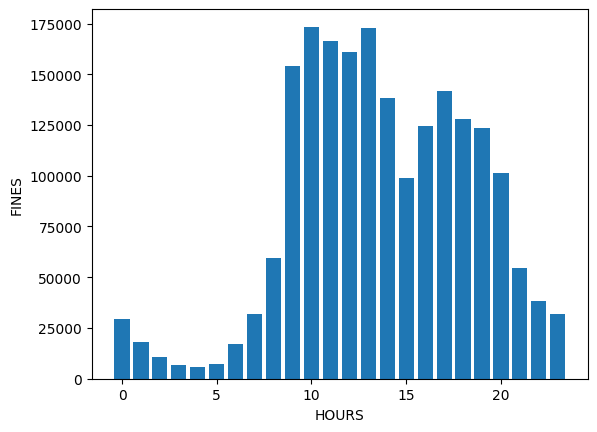

In [30]:
plt.bar(infractions_hour.keys().tolist(), infractions_hour.tolist())

plt.xlabel("HOURS")
plt.ylabel("FINES")

plt.show()

We can observe that more fines were taken near the noon.

 Knowing that the confinement in Spain began in March of that year, is the effect of the pandemic noticeable?

To see this We create a graphic that shows the fines made during 2020 by month. 

We obtain the total count of fines taken in each month. To do it We used the function count.plot() has been applied, which gives the count of the number of repeated values in the column MONTH. 

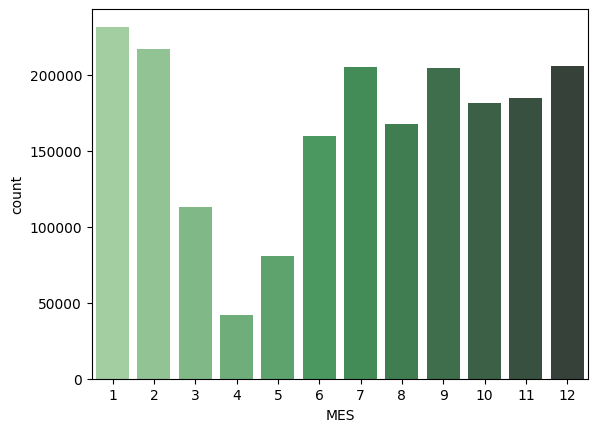

In [31]:
#Plots the count of rows for each MONTH in the dataframe in green degraded
sns.countplot(x= "MES", data= df, palette= "Greens_d")

plt.show()

We can appreciate how the start of the COVID pandemic affeted the infractions made.

How many infractions each of the public agents has denounced by classification of the infraction?

We use again the `countplot()` function to plot to show how many fines of each rating there is.
But this time We separate by public agency each in rating count.

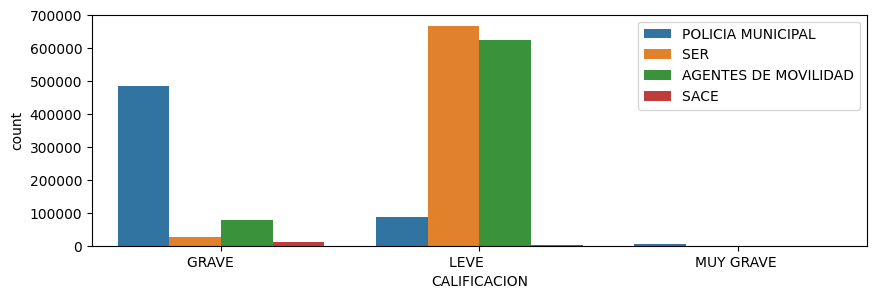

In [34]:
#We change the size of the plot so it can be full viewed 
f = plt.figure()
f.set_figwidth(10)
f.set_figheight(3)


#plots the count of fines of each rating for each public agency
#with a legend that indicates which public agency has make the complaint
sns.countplot(data = df, x = "CALIFICACION", hue = df.DENUNCIANTE, orient="h")

#We choose to put the legend at a position that let the result be viewed
plt.legend(loc='upper right')
plt.show()

We observe that POLICIA MUNICIPAL is the one that makes more complaints serious complaints.
SER and AGENTES DE MOVILIDAD are the agencies that make more minor complaints.